In [1]:
import numpy as np

x = np.array([1,2,3])
print(x.__class__)
print(x.shape)

print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [2]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
print(W + X)

print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


In [3]:
A = np.array([[1,2],[3,4]])
print(A*10)

[[10 20]
 [30 40]]


In [4]:
A = np.array([[1,2],[3,4]])
b = np.array([10,20])

A * b

array([[10, 40],
       [30, 80]])

In [5]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.dot(a,b))

A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print(np.matmul(A,B))

32
[[19 22]
 [43 50]]


In [6]:
import numpy as np

W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10,2)
h = np.matmul(x,W1) +b1

In [7]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [8]:
x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

In [9]:
class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + B
        return out

In [10]:
import numpy as np

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.I, self.H, self.O = input_size, hidden_size, output_size

        self.W1 = np.random.randn(self.I, self.H) 
        self.b1 = np.random.randn(self.H) 
        self.W2 = np.random.randn(self.H, self.O)
        self.b2 = np.random.randn(self.O)

        self.layers = [
            Affine(self.W1, self.b1),
            Sigmoid(), 
            Affine(self.W2, self.b2) 
        ]

        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


In [11]:
import numpy as np
D, N = 8,7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis = 0)
dy = np.random.randn(N, D)
dx = np.sum(dy, axis = 0, keepdims = True)

In [12]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW  # 깊은 복사
        return dx

In [13]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

a = b
print(id(a) == id(b))

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a[...] = b

print(id(a) == id(b))

True
False


In [14]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [15]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax, cross_entropy_error

class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None 
        self.t = None 
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        if self.t.size == self.y.size:
            self.t = self.t. argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx /= batch_size

        return dx

In [17]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr  # learning rate

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [18]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt

from dataset import spiral

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


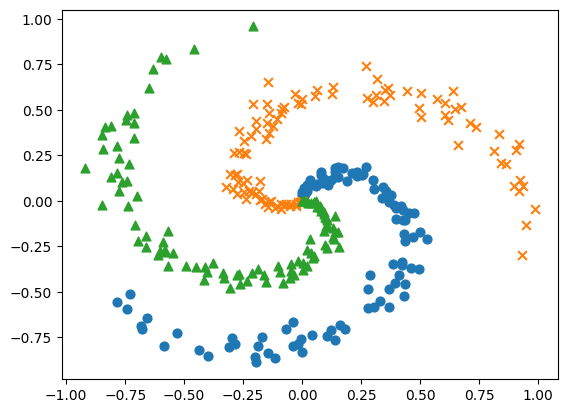

In [19]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [20]:
import sys
sys.path.append('..')
from common.np import *
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 레이어 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [ ]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.optimizer import SGD
from dataset import spiral
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads  += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        scores = self.predict(x)
        loss = self.loss_layer.forward(scores, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2,
                    hidden_size=hidden_size,
                    output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in (range(max_epoch)):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| epoch {epoch+1} | iteration {iters+1}/{max_iters} | loss {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 | iteration 10/10 | loss 1.13
| epoch 2 | iteration 10/10 | loss 1.13
| epoch 3 | iteration 10/10 | loss 1.12
| epoch 4 | iteration 10/10 | loss 1.12
| epoch 5 | iteration 10/10 | loss 1.11
| epoch 6 | iteration 10/10 | loss 1.14
| epoch 7 | iteration 10/10 | loss 1.16
| epoch 8 | iteration 10/10 | loss 1.11
| epoch 9 | iteration 10/10 | loss 1.12
| epoch 10 | iteration 10/10 | loss 1.13
| epoch 11 | iteration 10/10 | loss 1.12
| epoch 12 | iteration 10/10 | loss 1.11
| epoch 13 | iteration 10/10 | loss 1.09
| epoch 14 | iteration 10/10 | loss 1.08
| epoch 15 | iteration 10/10 | loss 1.04
| epoch 16 | iteration 10/10 | loss 1.03
| epoch 17 | iteration 10/10 | loss 0.96
| epoch 18 | iteration 10/10 | loss 0.92
| epoch 19 | iteration 10/10 | loss 0.92
| epoch 20 | iteration 10/10 | loss 0.87
| epoch 21 | iteration 10/10 | loss 0.85
| epoch 22 | iteration 10/10 | loss 0.82
| epoch 23 | iteration 10/10 | loss 0.79
| epoch 24 | iteration 10/10 | loss 0.78
| epoch 25 | iteration 10

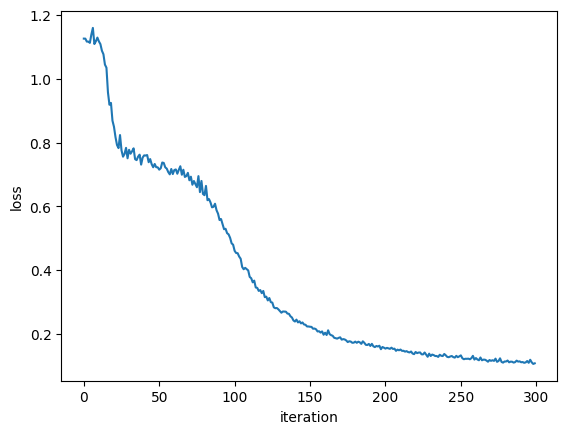

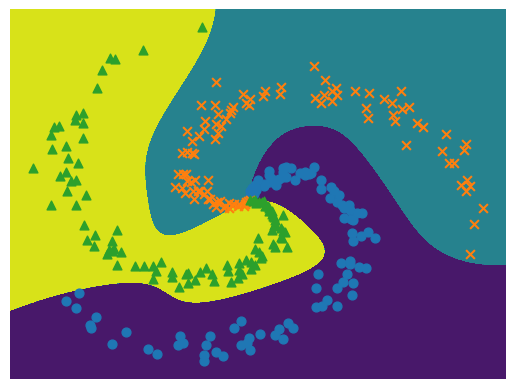

In [32]:
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [34]:
import numpy as np

np.random.permutation(10)


array([6, 9, 5, 4, 1, 0, 8, 7, 3, 2], dtype=int32)

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

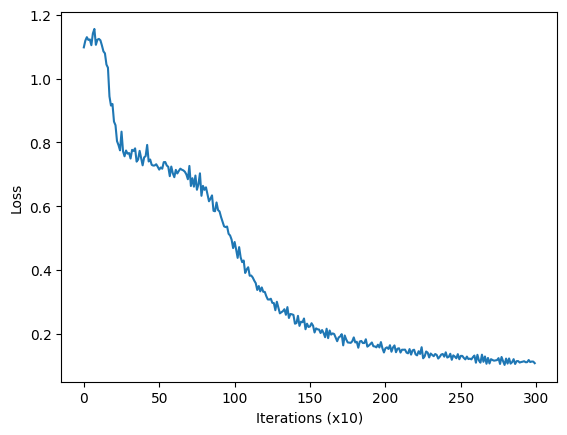

In [27]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

In [29]:
import numpy as np

a = np.random.randn(3)
print(a.dtype)

b = np.random.randn(3).astype(np.float32)
print(b.dtype)

c = np.random.randn(3).astype('f')
print(c.dtype)

float64
float32
float32


In [31]:
import cupy as cp

x = cp.arange(6).reshape(2, 3).astype('f')
x

ModuleNotFoundError: No module named 'cupy'

In [ ]:
x.sum(axis=1)